![https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png](https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png)

In [1]:
%matplotlib widget
import sys
sys.path.append('../')
# !pip install invertedai==0.0.3rc0
from IPython.display import clear_output
from invertedai import Jupyter_Render
import numpy as np
import cv2
import invertedai as iai
clear_output()

In [2]:
iai.add_apikey("")
available_locations = iai.available_locations("carla", "roundabout")
print(available_locations)

['CARLA:Town03:Roundabout']


Jupyter_Render(children=(HBox(children=(Play(value=0, description='Press play', max=0), IntSlider(value=0, des…

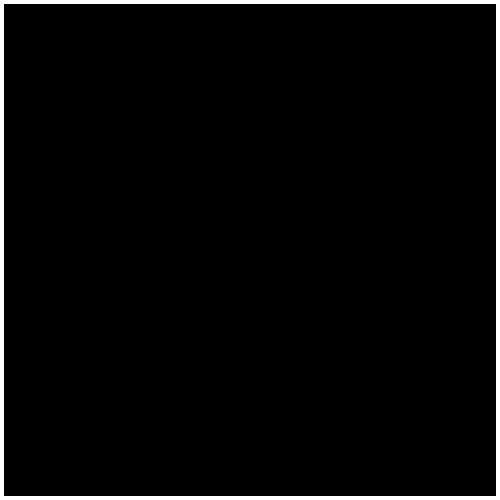

In [3]:
location=available_locations[0]
simulation_length = 100
renderer = Jupyter_Render()
display(renderer)

In [5]:
rendered_map = iai.location_info(location=location).rendered_map
rendered_map = cv2.imdecode(np.array(rendered_map, dtype=np.uint8), cv2.IMREAD_COLOR)
renderer.add_frame(rendered_map)

response = iai.initialize(
    location=location,
    agent_count=10,
)
agent_sizes = response.agent_sizes
frames = []
for t in range(simulation_length):
    response = iai.drive(
        agent_sizes=agent_sizes,
        agent_states=response.agent_states,
        recurrent_states=response.recurrent_states,
        get_birdviews=True,
        location=location,
        steps=1,
        exclude_ego_agent=1,
        traffic_states_id=response.traffic_states_id,
    )
    birdview = cv2.imdecode(np.array(response.bird_view, dtype=np.uint8), cv2.IMREAD_COLOR)
    renderer.add_frame(birdview)

Unable to spawn a scenario for 10 agents,  8 spawned instead.
